In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [3]:
auto_prices = pd.read_csv(r"C:\Users\hu\Desktop\datasets\Automobile price data _Raw_.csv")
auto_prices.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
auto_prices.columns = [str.replace("-","_") for str in auto_prices.columns]

In [5]:
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
(auto_prices.astype(np.object) == "?").any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [7]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [8]:
for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        counts = [count+1 for x in auto_prices[col] if x == "?"]
        print(col + " " + str(sum(counts)))

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


In [10]:
col = ["bore","stroke","horsepower","peak_rpm","price"]
#auto_prices.drop("normalized_losses",axis = 1,inplace = True)
for columns in col:
    auto_prices.loc[auto_prices[columns] == "?",columns] = np.nan
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
auto_prices.dropna(axis = 0,inplace = True)
auto_prices.shape

(195, 26)

In [12]:
col = ["bore","stroke","horsepower","peak_rpm","price"]
for column in col:
    auto_prices[column] = pd.to_numeric(auto_prices[column])

In [13]:
auto_prices[col].dtypes

bore          float64
stroke        float64
horsepower      int64
peak_rpm        int64
price           int64
dtype: object

In [14]:
auto_prices["num_of_cylinders"].value_counts()

four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [15]:
categories = {"two":"two_three","three":"two_three","four":"four_six","five":"four_six","six":"four_six",
             "eight":"eight_twelve","twelve":"eight_twelve"}
auto_prices["num_of_cylinders"] = [categories[x] for x in auto_prices["num_of_cylinders"]]
auto_prices["num_of_cylinders"].value_counts()

four_six        189
eight_twelve      5
two_three         1
Name: num_of_cylinders, dtype: int64

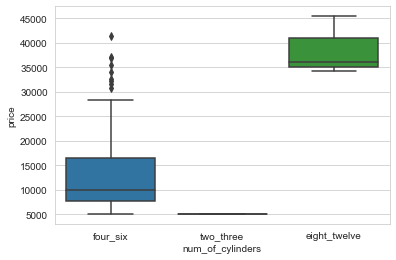

In [16]:
def boxplot(auto_prices,col,col_y="price"):
    sns.set_style("whitegrid")
    sns.boxplot(col,col_y,data = auto_prices)
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()
boxplot(auto_prices,"num_of_cylinders")

In [17]:
auto_prices["body_style"].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [18]:
body_cats = {"sedan":"sedan","hatchback":"hatchback","wagon":"wagon","hardtop":"hardtop_convert",
             "convertible":"hardtop_convert"}
auto_prices["body_style"] = [body_cats[x] for x in auto_prices["body_style"]]
auto_prices["body_style"].value_counts()

sedan              94
hatchback          63
wagon              24
hardtop_convert    14
Name: body_style, dtype: int64

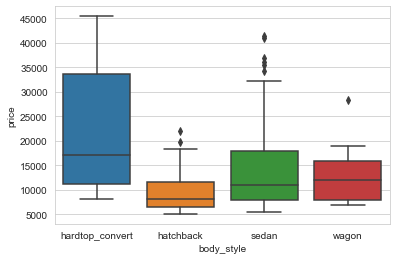

In [19]:
boxplot(auto_prices,"body_style")

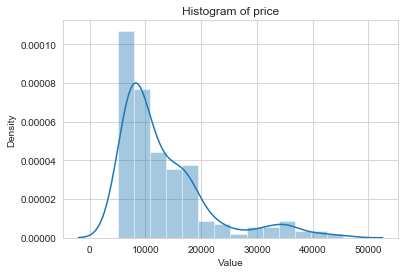

In [20]:
def hist_plot(vals,lab):
    sns.distplot(vals)
    plt.title("Histogram of "+ lab)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()
hist_plot(auto_prices["price"],"price")

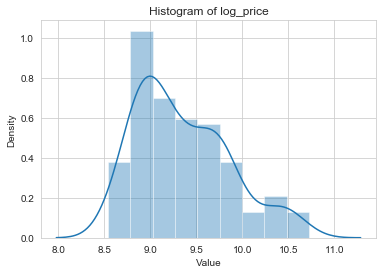

In [21]:
auto_prices["log_price"] = np.log(auto_prices["price"])
hist_plot(auto_prices["log_price"],"log_price")

In [22]:
auto_prices["fuel_type"].unique()

array(['gas', 'diesel'], dtype=object)

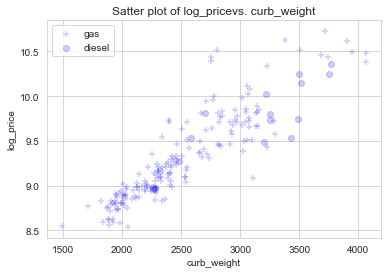

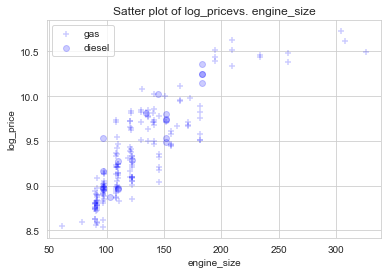

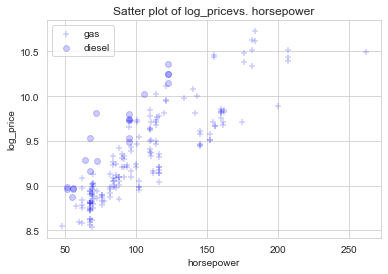

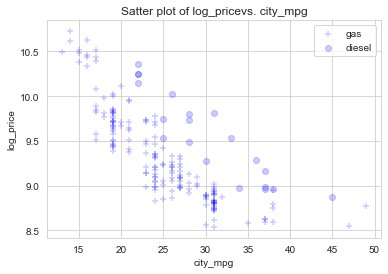

In [28]:
def plot_scatter_shape(auto_prices,cols,shape_col = "fuel_type",col_y = "log_price",alpha = 0.2):
    shapes = ["+","o","s","x","^"]
    unique_cat = auto_prices[shape_col].unique()
    for col in cols:
        sns.set_style("whitegrid")
        for i,cat in enumerate(unique_cat):
            temp = auto_prices[auto_prices[shape_col]==cat]
            sns.regplot(col,col_y,data = temp,marker = shapes[i],label = cat,
                        scatter_kws = {"alpha":alpha},fit_reg = False,color = "blue")
        plt.title("Satter plot of "+ col_y + "vs. "+col)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.legend()
        plt.show()
num_cols = ["curb_weight","engine_size","horsepower","city_mpg"]
plot_scatter_shape(auto_prices,num_cols)

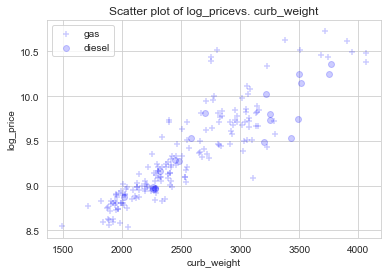

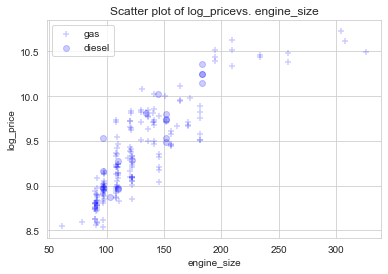

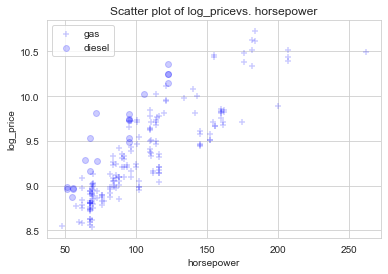

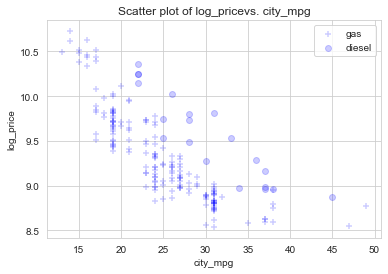

In [32]:
def plot_scatter_shape(auto_prices,cols,shape_col = "fuel_type",col_y = "log_price",alpha = 0.2):
    shapes = ["+","o","s","^"]
    unique_cat = auto_prices["fuel_type"].unique()
    for col in cols:
        for i,cat in enumerate(unique_cat):
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col,col_y,data = temp,marker = shapes[i],label = cat,
                       scatter_kws = {"alpha":alpha},fit_reg = False,color = "blue")
        plt.title("Scatter plot of "+col_y+"vs. "+col)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.legend()
        plt.show()
num_cols = ["curb_weight","engine_size","horsepower","city_mpg"]
plot_scatter_shape(auto_prices,num_cols)

In [33]:
np.random.seed(2233)
col_dic = {0:"blue",1:"green",2:"orange",3:"gray",4:"magenta",5:"black"}
from sklearn.cluster import KMeans

In [48]:
from sklearn.preprocessing import StandardScaler
Features = np.array(pd.read_csv(r"C:\Users\hu\Desktop\datasets\Auto_Data_Features.csv"))
Labels = np.array(pd.read_csv(r"C:\Users\hu\Desktop\datasets\Auto_Data_Labels.csv"))
scaler = StandardScaler()
Labels = np.log(Labels)
Labels = scaler.fit_transform(Labels)
Auto_Data = np.concatenate((Features,Labels),1)
Auto_Data.shape

(195, 46)

In [49]:
marker_dic = {('gas','std'):'o', ('gas','turbo'):'s', ('diesel','std'):'x', ('diesel','turbo'):'^'}
markers = [marker_dic[(x,y)] for x,y in zip(auto_prices['fuel_type'], auto_prices['aspiration'])]

In [52]:
kmeans_2 = KMeans(n_clusters = 2,random_state = 0)
assignments_km2 = kmeans_2.fit_predict(Auto_Data)
assignments_color_km2= [col_dic[x] for x in assignments_km2]

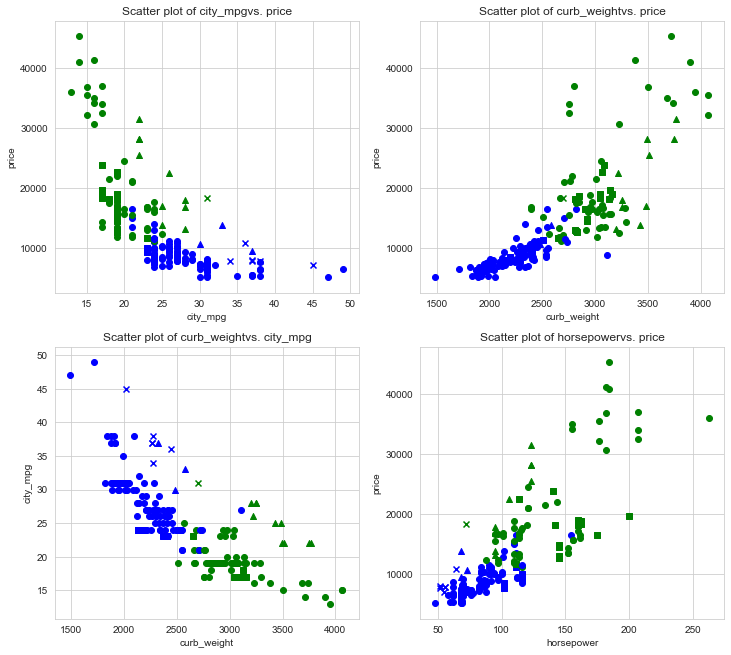

In [54]:
def plot_auto_cluster(auto_prices,assign_color,markers):
    fig,ax = plt.subplots(2,2,figsize = (12,11))
    x_cols = ['city_mpg', 'curb_weight', 'curb_weight', 'horsepower']
    y_cols = ['price', 'price', 'city_mpg', 'price']
    for x_col,y_col,i,j in zip(x_cols,y_cols,[0,0,1,1],[0,1,0,1]):
        for x,y,c,m in zip(auto_prices[x_col],auto_prices[y_col],assign_color,markers):
            ax[i,j].scatter(x,y,color = c,marker = m)
        ax[i,j].set_title("Scatter plot of "+ x_col+"vs. "+y_col)
        ax[i,j].set_xlabel(x_col)
        ax[i,j].set_ylabel(y_col)
    plt.show()
plot_auto_cluster(auto_prices,assignments_color_km2,markers)

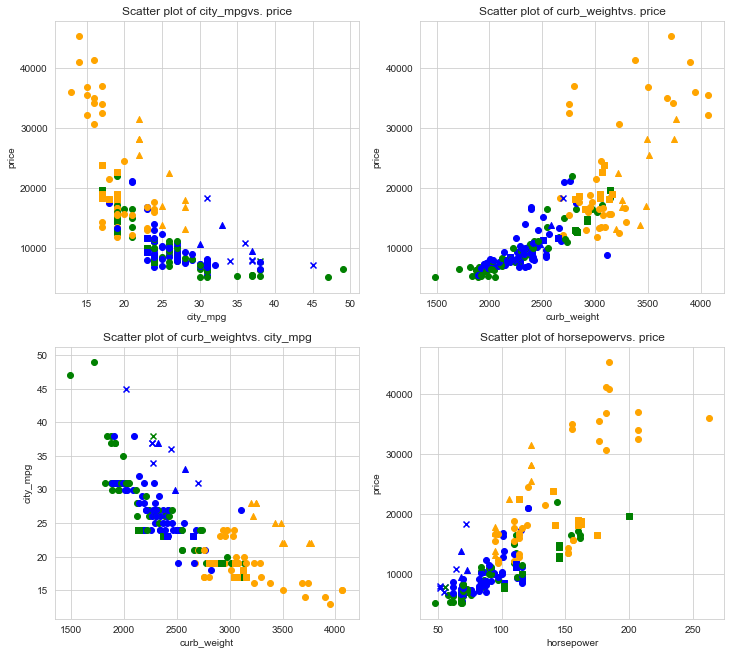

In [55]:
np.random.seed(2334)
kmeans_3 = KMeans(n_clusters = 3,random_state = 0)
assignments_km3 = kmeans_3.fit_predict(Auto_Data)
assignments_color_km3= [col_dic[x] for x in assignments_km3]
plot_auto_cluster(auto_prices,assignments_color_km3,markers)

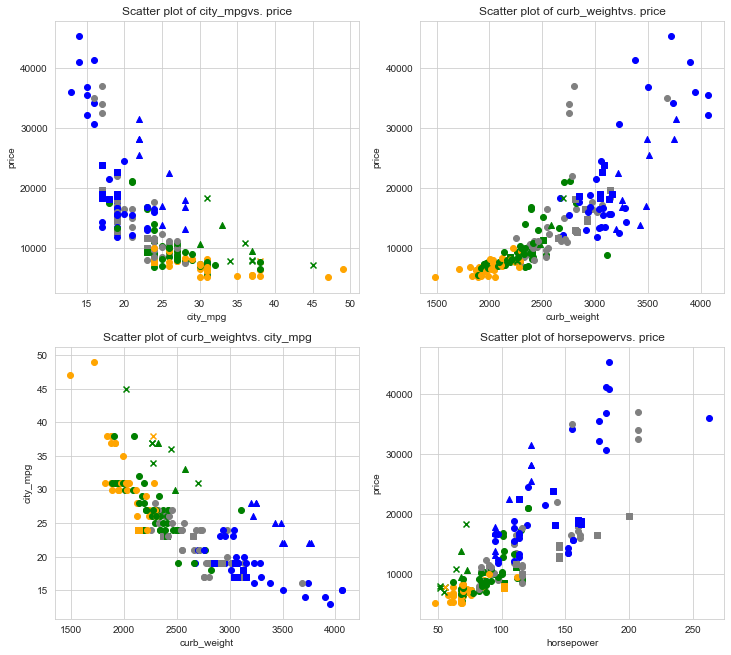

In [56]:
np.random.seed(2335)
kmeans_4 = KMeans(n_clusters = 4,random_state = 0)
assignments_km4 = kmeans_4.fit_predict(Auto_Data)
assignments_color_km4= [col_dic[x] for x in assignments_km4]
plot_auto_cluster(auto_prices,assignments_color_km4,markers)

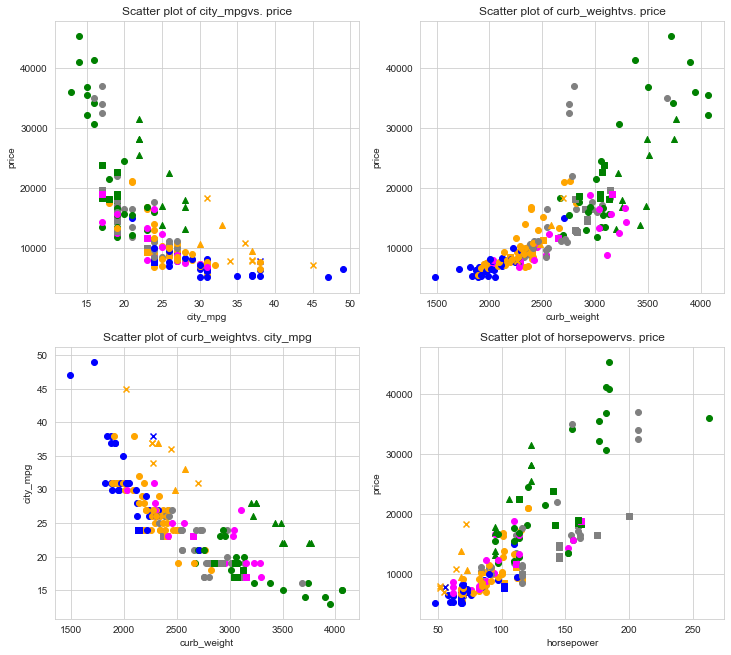

In [57]:
np.random.seed(2336)
kmeans_5 = KMeans(n_clusters = 5,random_state = 0)
assignments_km5 = kmeans_5.fit_predict(Auto_Data)
assignments_color_km5= [col_dic[x] for x in assignments_km5]
plot_auto_cluster(auto_prices,assignments_color_km5,markers)

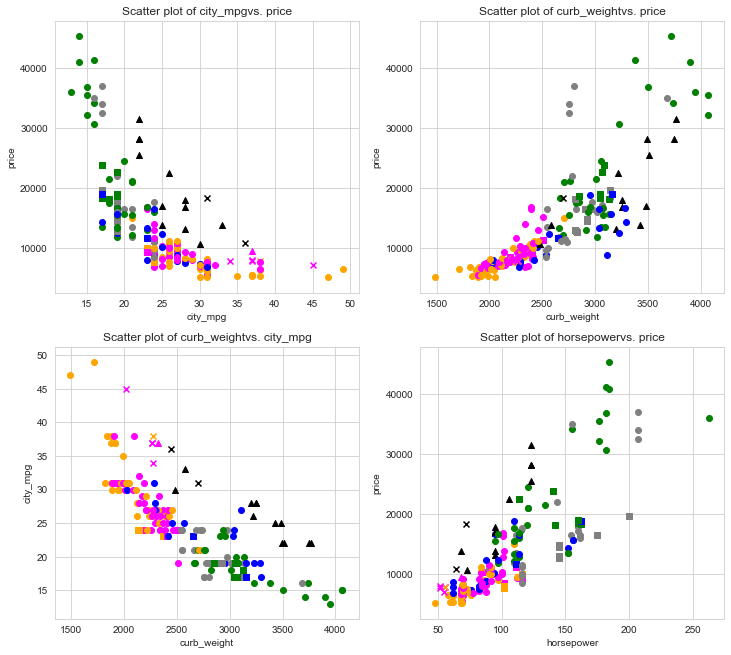

In [58]:
np.random.seed(2337)
kmeans_6 = KMeans(n_clusters = 6,random_state = 0)
assignments_km6 = kmeans_6.fit_predict(Auto_Data)
assignments_color_km6= [col_dic[x] for x in assignments_km6]
plot_auto_cluster(auto_prices,assignments_color_km6,markers)

In [59]:
kmeans_6.inertia_

1214.500852764938